In [1]:
import pandas as pd

In [2]:
# link to a cases dataset 
# https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country
europe_cases = pd.read_csv("europe_daily_cases.csv")

In [3]:
europe_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe


In [4]:
# link to a vaccination dataset
# https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea
# Explanation to the data
# https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_VaccineTracker-04-11-2021.pdf
vaccine = pd.read_csv("vaccine.csv")

In [5]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213293 entries, 0 to 213292
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          213293 non-null  object 
 1   ReportingCountry     213293 non-null  object 
 2   Denominator          122787 non-null  float64
 3   NumberDosesReceived  31598 non-null   float64
 4   NumberDosesExported  21751 non-null   float64
 5   FirstDose            213293 non-null  int64  
 6   FirstDoseRefused     1434 non-null    float64
 7   SecondDose           213293 non-null  int64  
 8   DoseAdditional1      213293 non-null  int64  
 9   UnknownDose          213293 non-null  int64  
 10  Region               213293 non-null  object 
 11  TargetGroup          213293 non-null  object 
 12  Vaccine              213293 non-null  object 
 13  Population           213293 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 22.8+ MB


In [6]:
vaccine.head(5)

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064
1,2020-W53,AT,8901064.0,61425.0,0.0,5286,NaN,0,0,0,AT,ALL,COM,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064


In [7]:
from datetime import datetime
from isoweek import Week

def process(row):
    row = list(row)
    datetime = []
    for item in row:
        year = int(item.split("-")[0])
        week = int(item.split("-")[1][1:])
        datetime.append(Week(year, week).monday())
    return pd.Series(datetime)

In [8]:
vaccine["date"] = process(vaccine["YearWeekISO"])

In [9]:
vaccine.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,date
0,2020-W53,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064,2020-12-28
1,2020-W53,AT,8901064.0,61425.0,0.0,5286,NaN,0,0,0,AT,ALL,COM,8901064,2020-12-28
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064,2020-12-28
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064,2020-12-28
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064,2020-12-28


In [10]:
vaccine = vaccine.drop(columns=["YearWeekISO"])

In [11]:
vaccine.head()

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,date
0,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064,2020-12-28
1,AT,8901064.0,61425.0,0.0,5286,NaN,0,0,0,AT,ALL,COM,8901064,2020-12-28
2,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064,2020-12-28
3,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064,2020-12-28
4,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064,2020-12-28


In [12]:
countries = vaccine.ReportingCountry.unique()

In [13]:
countries_data = []
for code in countries:
    countries_data.append(vaccine.loc[(vaccine["ReportingCountry"] == code) &\
                                      (vaccine["NumberDosesReceived"] != 0.0)])

In [14]:
data = vaccine.loc[vaccine["NumberDosesReceived"] != 0.0].\
               groupby(by=["ReportingCountry", "date"], as_index=False).sum().\
               drop(columns=["NumberDosesReceived", "Population",\
                             "Denominator", "NumberDosesExported"])

In [15]:
total_first = []
total_second = []
total_third = []
for code in countries:
    total_first += list(data.loc[data["ReportingCountry"] == code].FirstDose.cumsum())
    total_second += list(data.loc[data["ReportingCountry"] == code].SecondDose.cumsum())
    total_third += list(data.loc[data["ReportingCountry"] == code].DoseAdditional1.cumsum())
data["TotalFirstDoses"] = total_first
data["TotalSecondDoses"] = total_second
data["TotalThirdDoses"] = total_third
data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,TotalThirdDoses
0,AT,2020-12-28,10584,0.0,0,0,0,10584,0,0
1,AT,2021-01-04,52516,0.0,0,0,0,63100,0,0
2,AT,2021-01-11,170188,0.0,806,4,0,233288,806,4
3,AT,2021-01-18,186184,0.0,9214,4,0,419472,10020,8
4,AT,2021-01-25,55124,0.0,35142,2,0,474596,45162,10


In [16]:
# validating the shape
data.shape

(1581, 10)

In [17]:
pop_dict = {}
country_codes = vaccine.ReportingCountry.unique()
population_series = []
for code in country_codes:
    serie = vaccine.loc[vaccine["ReportingCountry"] == code]["Population"].unique()
    pop_dict[code] = serie

#### that is interesting ot see, that the dataset doesnt reflect on population change

In [18]:
data["Population"] = ""
for code in country_codes:
    data.loc[data["ReportingCountry"] == code, "Population"] = pop_dict[code][0]
data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,TotalThirdDoses,Population
0,AT,2020-12-28,10584,0.0,0,0,0,10584,0,0,8901064
1,AT,2021-01-04,52516,0.0,0,0,0,63100,0,0,8901064
2,AT,2021-01-11,170188,0.0,806,4,0,233288,806,4,8901064
3,AT,2021-01-18,186184,0.0,9214,4,0,419472,10020,8,8901064
4,AT,2021-01-25,55124,0.0,35142,2,0,474596,45162,10,8901064


In [19]:
# validating the shape
data.shape

(1581, 11)

In [20]:
import matplotlib.pyplot as plt

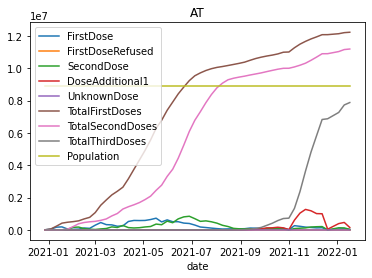

In [21]:
data.loc[data["ReportingCountry"] == 'AT'].drop(columns=["ReportingCountry"]).set_index("date").plot(title="AT")
plt.show()

In [22]:
total_data = data

In [23]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReportingCountry  1581 non-null   object 
 1   date              1581 non-null   object 
 2   FirstDose         1581 non-null   int64  
 3   FirstDoseRefused  1581 non-null   float64
 4   SecondDose        1581 non-null   int64  
 5   DoseAdditional1   1581 non-null   int64  
 6   UnknownDose       1581 non-null   int64  
 7   TotalFirstDoses   1581 non-null   int64  
 8   TotalSecondDoses  1581 non-null   int64  
 9   TotalThirdDoses   1581 non-null   int64  
 10  Population        1581 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 136.0+ KB


In [24]:
AT_data = data.loc[data["ReportingCountry"] == 'AT'][["date", "TotalFirstDoses", "TotalSecondDoses", "DoseAdditional1"]]

In [25]:
AT_data.head()

,date,TotalFirstDoses,TotalSecondDoses,DoseAdditional1
0,2020-12-28,10584,0,0
1,2021-01-04,63100,0,0
2,2021-01-11,233288,806,4
3,2021-01-18,419472,10020,4
4,2021-01-25,474596,45162,2


In [26]:
europe_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe


In [27]:
europe_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  9450 non-null   object
 1   day                      9450 non-null   int64 
 2   month                    9450 non-null   int64 
 3   year                     9450 non-null   int64 
 4   cases                    9450 non-null   int64 
 5   deaths                   9450 non-null   int64 
 6   countriesAndTerritories  9450 non-null   object
 7   geoId                    9450 non-null   object
 8   countryterritoryCode     9450 non-null   object
 9   popData2020              9450 non-null   int64 
 10  continentExp             9450 non-null   object
dtypes: int64(6), object(5)
memory usage: 812.2+ KB


### Will start just with one country, to make it easier

### Later will just repeat same thing for entire dataset

In [28]:
at_cases = europe_cases.loc[europe_cases["geoId"] == "AT"]

In [29]:
at_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe


In [30]:
at_cases["isoWeek"] = pd.to_datetime(at_cases["dateRep"]).dt.strftime('%Y-W%U')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
at_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,isoWeek
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe,2022-W03
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe,2022-W03
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe,2022-W03
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe,2022-W03
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe,2022-W03


In [32]:
at_cases["date"] = process(at_cases["isoWeek"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
at_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,isoWeek,date
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17


In [34]:
at_cases = at_cases[["cases", "deaths", "date", "geoId"]]

In [35]:
at_cases.head()

,cases,deaths,date,geoId
0,30085,8,2022-01-17,AT
1,15672,17,2022-01-17,AT
2,16049,3,2022-01-17,AT
3,16190,3,2022-01-17,AT
4,17169,7,2022-01-17,AT


In [36]:
at_cases = at_cases.groupby(by=["date"], as_index=False).sum()

In [37]:
at_cases.head()

,date,cases,deaths
0,2021-01-04,463496,8584
1,2021-01-11,15957,91
2,2021-02-01,6225,69
3,2021-02-08,20295,77
4,2021-03-01,7207,75


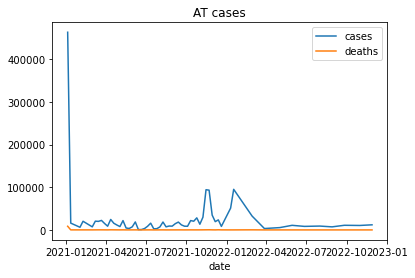

In [38]:
at_cases.set_index("date").plot(title="AT cases")
plt.show()

### Now, let's try to combine cases and vaccination

In [39]:
data.loc[data["ReportingCountry"] == 'AT'].head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,TotalThirdDoses,Population
0,AT,2020-12-28,10584,0.0,0,0,0,10584,0,0,8901064
1,AT,2021-01-04,52516,0.0,0,0,0,63100,0,0,8901064
2,AT,2021-01-11,170188,0.0,806,4,0,233288,806,4,8901064
3,AT,2021-01-18,186184,0.0,9214,4,0,419472,10020,8,8901064
4,AT,2021-01-25,55124,0.0,35142,2,0,474596,45162,10,8901064


In [40]:
at_data = pd.merge(data.loc[data["ReportingCountry"] == 'AT'], at_cases, on=["date"])

In [41]:
at_data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,TotalThirdDoses,Population,cases,deaths
0,AT,2021-01-04,52516,0.0,0,0,0,63100,0,0,8901064,463496,8584
1,AT,2021-01-11,170188,0.0,806,4,0,233288,806,4,8901064,15957,91
2,AT,2021-02-01,37134,0.0,159066,40,0,511730,204228,50,8901064,6225,69
3,AT,2021-02-08,49332,0.0,176624,16,0,561062,380852,66,8901064,20295,77
4,AT,2021-03-01,293072,0.0,27288,4,0,1070774,529710,110,8901064,7207,75


<AxesSubplot:title={'center':'AT'}, xlabel='date'>

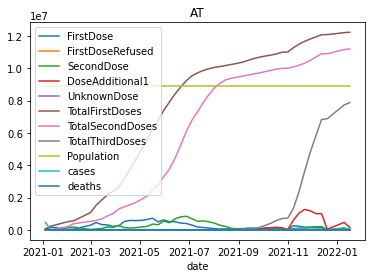

In [42]:
at_data.set_index("date").plot(title="AT")

In [43]:
plt.savefig("results/" + "AT.png")

<Figure size 432x288 with 0 Axes>

 ### Now let's do the same for entire dataset

In [44]:
cases = europe_cases
cases["isoWeek"] = pd.to_datetime(cases["dateRep"]).dt.strftime('%Y-W%U')
cases["date"] = process(cases["isoWeek"])
cases = cases[["cases", "deaths", "date", "geoId"]]
cases = cases.groupby(by=["date", "geoId"], as_index=False).sum()

In [58]:
countries_data = []
for code in country_codes:
    countries_data.append(pd.merge(data.loc[data["ReportingCountry"] == code],
             cases.loc[cases["geoId"] == code], on=["date"]))


In [59]:
countries_data[0].head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,TotalThirdDoses,Population,geoId,cases,deaths
0,AT,2021-01-04,52516,0.0,0,0,0,63100,0,0,8901064,AT,463496,8584
1,AT,2021-01-11,170188,0.0,806,4,0,233288,806,4,8901064,AT,15957,91
2,AT,2021-02-01,37134,0.0,159066,40,0,511730,204228,50,8901064,AT,6225,69
3,AT,2021-02-08,49332,0.0,176624,16,0,561062,380852,66,8901064,AT,20295,77
4,AT,2021-03-01,293072,0.0,27288,4,0,1070774,529710,110,8901064,AT,7207,75


In [60]:
for country in countries_data:
    country["FirstDose"] /= country["Population"]
    country["FirstDoseRefused"] /= country["Population"]
    country["SecondDose"] /= country["Population"]
    country["DoseAdditional1"] /= country["Population"]
    country["UnknownDose"] /= country["Population"]
    country["TotalFirstDoses"] /= country["Population"]
    country["TotalSecondDoses"] /= country["Population"]
    country["cases"] /= country["Population"]
    country["deaths"] /= country["Population"]
    country["TotalThirdDoses"] /= country["Population"]
    country["Population"] /= country["Population"]

<AxesSubplot:title={'center':'AT'}, xlabel='date'>

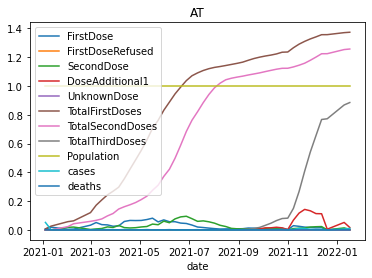

In [61]:
countries_data[0].set_index("date").plot(title="AT")

##### As the graph doesn't tell us pretty much anything, and, in general, looking at just numbers is pretty useless, let's multiply cases and deaths by K, so we could see how vaccination affects the change in cases and deaths

In [62]:
K = 100

In [63]:
for country in countries_data:
    country["deaths"] *= K
    country["cases"] *= K
    country.rename(columns={"deaths" : f"deaths * {K}" , "cases" : f"cases * {K}"})

<AxesSubplot:title={'center':'AT'}, xlabel='date'>

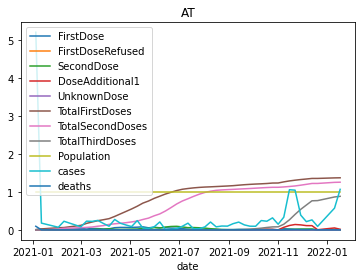

In [64]:
countries_data[0].set_index("date").plot(title="AT")

##### Let's drop first rows for all contries, to get rid of "old" (accumulative for 2020) data

In [65]:
for i in range(len(countries_data)):
    countries_data[i] = countries_data[i].iloc[1: , :]

<AxesSubplot:title={'center':'AT'}, xlabel='date'>

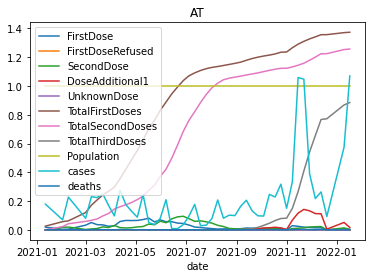

In [66]:
countries_data[0].set_index("date").plot(title="AT")

In [67]:
for i in range(len(countries_data)):
    countries_data[i] = countries_data[i][["date", "ReportingCountry", "TotalFirstDoses", "TotalSecondDoses", "TotalThirdDoses", "Population", 
                                          "cases", "deaths"]]

<AxesSubplot:title={'center':'AT'}, xlabel='date'>

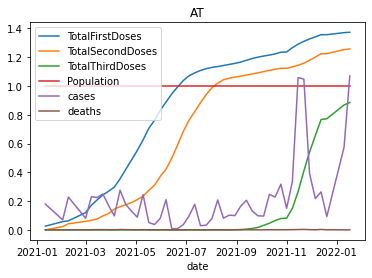

In [68]:
countries_data[0].set_index("date").plot(title="AT")

### Note, that Cases and Deaths here are multiplied by 100, and does NOT give a accurate representation

### What we care aboout is the change, as we want to know if and how vaccination affects these two parameters.

### To make this even more interesting, we can add vertical lines, showing date of new Covid-19 variant, to show the affect of vaccination on cases and deaths from new variant

In [1]:
for country in countries_data:
    country.set_index("date").plot(title=country.ReportingCountry.iloc[0])

NameError: name 'countries_data' is not defined

In [70]:
# def plot_fig(df, code):
#     fig = plt.figure()
#     a = plt.plot(title=code)
#     return fig

# plots = []
# for code in pop_dict.keys():
#     plots.append(plot_fig(data.loc[data["ReportingCountry"] == code].\
#           drop(columns=["ReportingCountry"]).set_index("date"),code))
# with PdfPages('/results/AllInOne.pdf') as pdf:
#     fig = plt.figure()
#     for code in pop_dict.keys():
#         pdf.savefig(plot_fig(data.loc[data["ReportingCountry"] == code].\
#             drop(columns=["ReportingCountry"]).set_index("date"),code))